https://www.ritchieng.com/machine-learning-project-customer-segments/

In [39]:
# To apply EDA on the run dataset I will first have to load a couple of libraries that I will be using.
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display
from pandas.plotting import parallel_coordinates 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns

print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('scikit-learn version:', sk.__version__)
print('matplotlib version:', matplotlib.__version__)

%matplotlib inline

ModuleNotFoundError: No module named 'renders'

In [9]:
df_omzet = pd.read_csv('OmzetPerCatPerCustomer.csv', index_col='i')

In [13]:
df_omzet = df_omzet.fillna(0)
df_omzet.head()

,Customer.number,Control,Garden decoration,Garden furniture,Garden hand tools,Garden heating,Garden reamers,Gardening tools,Lounge furniture,Other furniture,Pruning,Sun protection,Watering
i,,,,,,,,,,,,,
1,1004532,364.95,2018.42,14145.05,0.00,1727.86,0.00,310.76,3557.53,483.94,1668.33,5880.92,0.00
2,1004533,3489.64,3210.61,26916.79,0.00,0.00,1388.70,714.75,1428.16,1342.10,2217.38,6267.48,1013.82
3,1004534,6383.07,3829.19,20145.52,156.80,2818.92,1570.40,156.07,3757.41,3812.12,491.44,4666.88,3340.49
4,1004535,919.80,2500.83,13900.15,396.99,1714.80,0.00,1114.90,315.37,4342.64,5384.55,3287.17,6995.46
5,1004536,1422.87,2674.35,11192.91,0.00,2769.05,114.81,398.51,3539.65,540.76,1776.75,3585.30,3630.03


In [28]:
df_omzet = df_omzet.drop('Customer.number', axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001390E436780>,
      dtype=object)

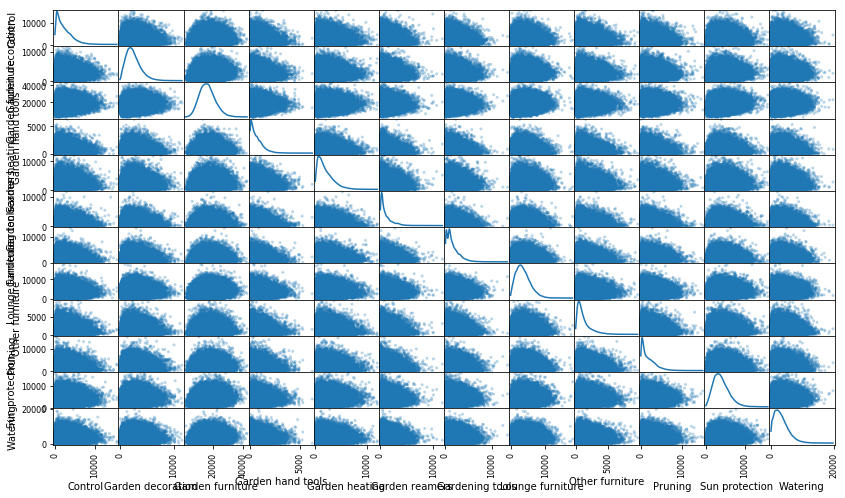

In [6]:
pd.plotting.scatter_matrix(df_omzet, alpha = 0.3, figsize = (14,8), diagonal = 'kde')

Most of them are left skewed and have to be normalized. There are no strong correlations seen.

In [29]:
scaler = StandardScaler()
scaler = scaler.fit(df_omzet)

ar_scaled = scaler.transform(df_omzet)
df_scaled = pd.DataFrame(data = ar_scaled, columns=df_omzet.columns)
df_scaled.head()

,Control,Garden decoration,Garden furniture,Garden hand tools,Garden heating,Garden reamers,Gardening tools,Lounge furniture,Other furniture,Pruning,Sun protection,Watering
0,-1.019970,-0.332695,-0.417678,-0.746673,-0.088456,-0.735670,-0.671421,0.006680,-0.647090,-0.003626,0.990692,-1.413060
1,0.658309,0.532069,2.080919,-0.746673,-1.230948,0.615283,-0.367118,-1.017954,0.176276,0.322467,1.184592,-0.965336
2,2.212378,0.980761,0.756223,-0.480797,0.632972,0.792044,-0.787940,0.102861,2.546149,-0.702606,0.381722,0.062169
3,-0.721959,0.017225,-0.465589,-0.073522,-0.097092,-0.735670,-0.065709,-1.553418,3.055159,2.203517,-0.310348,1.676280
4,-0.451759,0.143089,-0.995220,-0.746673,0.599998,-0.623981,-0.605324,-0.001923,-0.592573,0.060767,-0.160805,0.190036


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001393DA18EF0>,
      dtype=object)

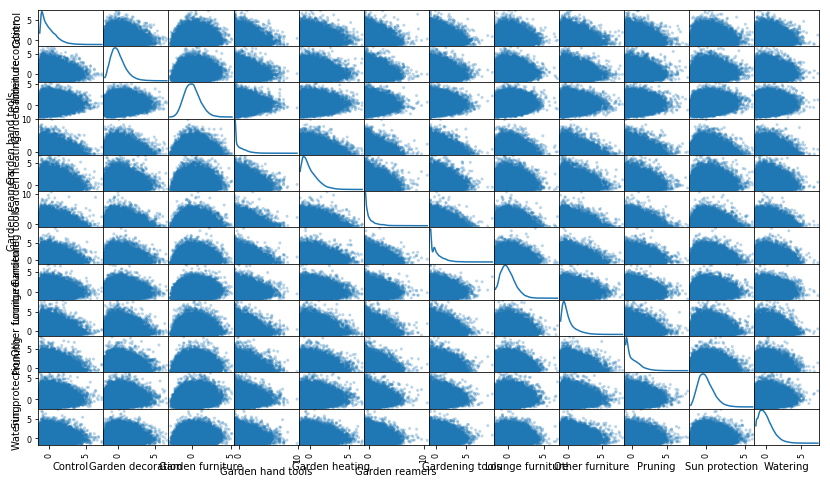

In [30]:
pd.plotting.scatter_matrix(df_scaled, alpha = 0.3, figsize = (14,8), diagonal = 'kde')

There are still some left skewed

In [52]:
from sklearn.decomposition import PCA
import renders as rs

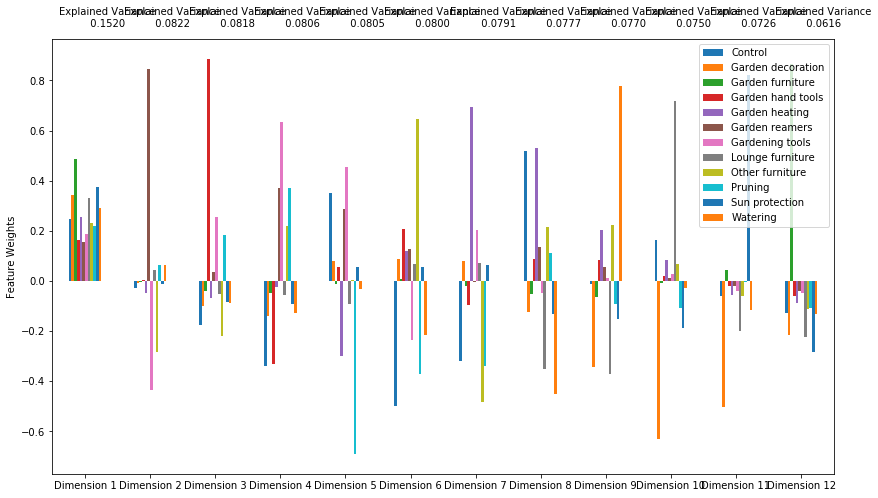

In [55]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
# Instantiate
pca = PCA(n_components=12)
# Fit
pca.fit(df_scaled)

pca_results = rs.pca_results(df_scaled, pca)

In [57]:
display(pca_results['Explained Variance'].cumsum())

Dimension 1     0.1520
Dimension 2     0.2342
Dimension 3     0.3160
Dimension 4     0.3966
Dimension 5     0.4771
Dimension 6     0.5571
Dimension 7     0.6362
Dimension 8     0.7139
Dimension 9     0.7909
Dimension 10    0.8659
Dimension 11    0.9385
Dimension 12    1.0001
Name: Explained Variance, dtype: float64

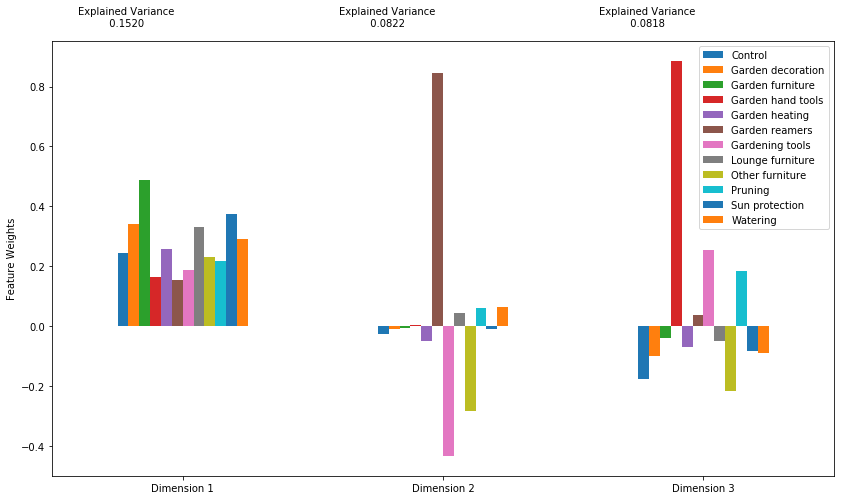

In [58]:
pca = PCA(n_components=3)
# Fit
pca.fit(df_scaled)

pca_results = rs.pca_results(df_scaled, pca)